In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import sklearn.linear_model
import matplotlib
import sklearn.metrics
import statsmodels.api as sm

In [60]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [61]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [62]:
df.shape

(15, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [64]:
df.rename(columns={"Ground Temperature":"Ground_Temperature"}, inplace=True)

In [65]:
df.head()

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [66]:
df.describe()

,Chirps/Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


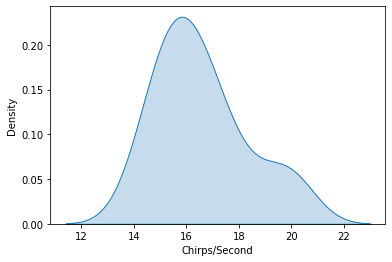

In [67]:
sns.kdeplot(df["Chirps/Second"], shade=True)

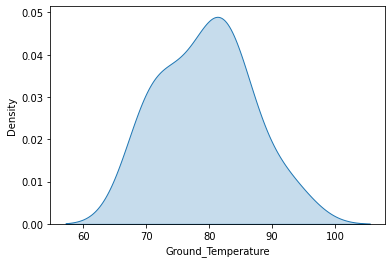

In [68]:
sns.kdeplot(df["Ground_Temperature"], shade=True)

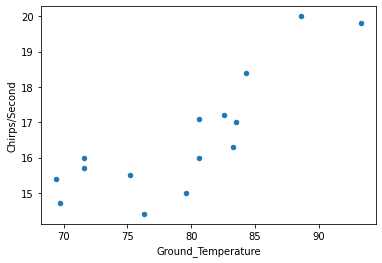

In [69]:
df.plot.scatter(x = "Ground_Temperature", y= "Chirps/Second")

In [70]:
X_train, X_test,y_train, y_test = sklearn.model_selection.train_test_split(df.loc[:,["Ground_Temperature"]], df["Chirps/Second"], test_size=0.33, random_state=42)

In [71]:
y_train.head()

8     15.4
2     19.8
1     16.0
14    14.4
4     17.1
Name: Chirps/Second, dtype: float64

In [72]:
linear_regression_model = sklearn.linear_model.LinearRegression(fit_intercept=True)
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [73]:
linear_regression_model.coef_

array([0.18555224])

In [74]:
linear_regression_model.intercept_

1.832590685610299

In [75]:
y_pred = linear_regression_model.predict(X_test)


In [76]:
linear_regression_model.score(X_test,y_test)

0.6414136442401406

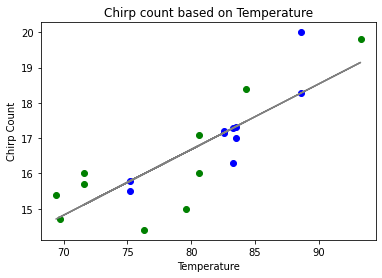

In [77]:
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'blue')   
plt.scatter(X_test, y_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(X_train, linear_regression_model.predict(X_train), color = 'gray')
plt.title('Chirp count based on Temperature')
plt.xlabel('Temperature')
plt.ylabel('Chirp Count')
plt.show()

In [78]:
sklearn.metrics.mean_absolute_error(y_test, y_pred)

0.6739379040687549

In [79]:
sklearn.metrics.mean_squared_error(y_test, y_pred) 

0.8304859999398344

In [80]:
sklearn.metrics.r2_score(y_test, y_pred)

0.6414136442401406

In [82]:
#If the ground temperature reached 95, then  the crickets would be chirping at the rate of 19.4 chirps per second

y_pred = linear_regression_model.predict([[95]])
print(y_pred)

[19.46005381]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
